In [1]:
"""Dependencies"""
# !pip install import-ipynb

# Python ≥3.7 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "1.0"
print('The scikit-learn version is {}.'.format(sklearn.__version__))


import gc
import pickle
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np
from pandas.core.common import flatten
import matplotlib.pyplot as plt

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/XoheImp.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/Y.csv"

The scikit-learn version is 1.0.2.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [2]:
#Set X and y values
X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

Splitting data

In [4]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42, stratify = y_train)

Ridge Regression

In [13]:
pipe1 = Pipeline([('scaler', StandardScaler()), 
                  ('Ridge', LogisticRegression(C= 0.1, random_state=0, verbose=3))])

In [14]:
gc.collect()

590

In [15]:
clf1 = pipe1.fit(X_train, y_train)  # fit the data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [16]:
with open('Ridge1', 'wb') as files:
    pickle.dump(clf1, files)

In [17]:
Y_pred1 = clf1.predict(X_val)

In [18]:
YpredProb = clf1.predict_proba(X_val)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred1))
print("F1:", metrics.f1_score(y_val, Y_pred1, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred1))

Accuracy: 0.953647153323085
F1: 0.9509395642920789
Matthew's Correlation Coefficient: 0.7883356791723778


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train)
y_val_le = le.transform(y_val)

print("ROC_AUC:", metrics.roc_auc_score(y_val_le, YpredProb, multi_class = 'ovr', average = 'macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC: 0.933005130013367


Logistic regression

In [21]:
pipe2 = Pipeline([('scaler', StandardScaler()), 
                  ('Logistic', LogisticRegression(penalty="none", random_state=0, verbose=3))])

In [24]:
gc.collect()

446

In [23]:
clf2 = pipe2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed

In [25]:
with open('Logistic', 'wb') as files:
    pickle.dump(clf2, files)

In [26]:
Y_pred2 = clf2.predict(X_val)

In [27]:
YpredProb1 = clf2.predict_proba(X_val)

In [28]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred2))
print("F1:", metrics.f1_score(y_val, Y_pred2, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred2))

Accuracy: 0.953550209813453
F1: 0.9507889939293719
Matthew's Correlation Coefficient: 0.7877111600941717


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train)
y_val_le = le.transform(y_val)

print("ROC_AUC:", metrics.roc_auc_score(y_val_le, YpredProb1, multi_class = 'ovr', average = 'macro'))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC_AUC: 0.9312383457271367


Evaluation

In [30]:
ScoresLOG = pd.DataFrame([["Ridge", 0.9536, 0.9509, 0.7883, 0.9333],["Logistic", 0.9535, 0.9508, 0.7877, 0.9312]], columns = ["model", "accuracy", "F1", "MCC", "ROC-AUC"])

In [31]:
ScoresLOG.to_csv("LogisticScores.csv", sep=";")

In [32]:
ScoresLOG

,model,accuracy,F1,MCC,ROC-AUC
0,Ridge,0.9536,0.9509,0.7883,0.9333
1,Logistic,0.9535,0.9508,0.7877,0.9312


In [33]:
ScoresLOG = ScoresLOG.set_index('model')

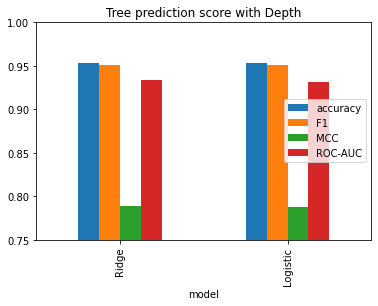

In [35]:
ScoresLOG.plot.bar(ylim = (0.75, 1), title = 'Tree prediction score with Depth').legend(loc='center right')